In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
x=np.random.normal(0,1,500)

In [5]:
sns.set_style('whitegrid')

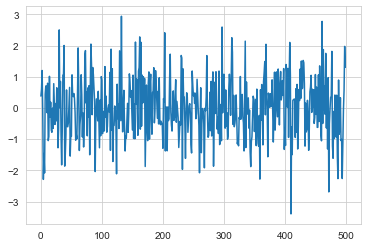

In [6]:
p=plt.plot(x)

In [21]:
#y=m0 + m1 x + m2 x^2 + .......
y2=np.random.normal(0,1,500) + (3*x) + (-3*(x**2))
y3=np.random.normal(0,1,500) + (3*x) + (-3*(x**2)) + (2*(x**3))
y4=np.random.normal(0,1,500) + (3*x) + (-3*(x**2))  +(-2*(x**3)) + (4*(x**4))

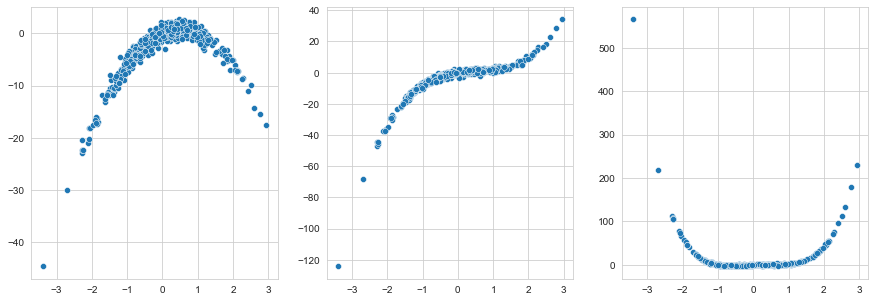

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
p=sns.scatterplot(x=x,y=y2)
plt.subplot(1,3,2)
p=sns.scatterplot(x=x,y=y3)
plt.subplot(1,3,3)
p=sns.scatterplot(x=x,y=y4)

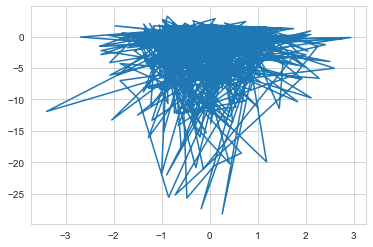

In [8]:
p=plt.plot(x,y)

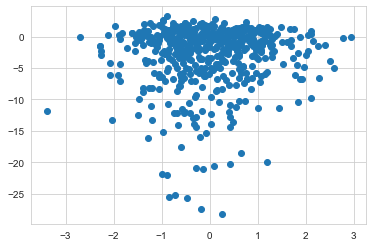

In [13]:
p=plt.scatter(x,y)

In [80]:
xdf=pd.DataFrame(x,columns=['feats'])
xdf.head(1)

,feats
0,0.380607


In [81]:
y2s=pd.Series(y2)
y3s=pd.Series(y3)
y4s=pd.Series(y4)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
xtrain,xtest,ytrain,ytest = train_test_split(xdf,y3s,test_size=0.2,random_state=100)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model=LinearRegression().fit(xtrain,ytrain)

In [86]:
model.score(xtest,ytest)*100

74.2266184795667

In [87]:
ypred=model.predict(xtest)

In [88]:
xtest.head(1)

,feats
69,-0.160407


<AxesSubplot:xlabel='feats'>

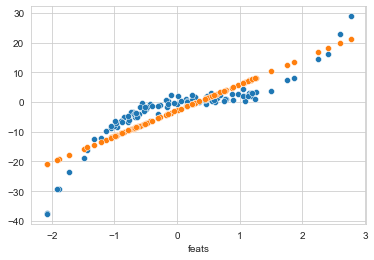

In [89]:
sns.scatterplot(x='feats',y=ytest,data=xtest)
sns.scatterplot(x='feats',y=ypred,data=xtest)

In [93]:
from sklearn.preprocessing import PolynomialFeatures as pf

In [104]:
x1=pd.DataFrame(pf(degree=1).fit_transform(xdf))
x2=pd.DataFrame(pf(degree=2).fit_transform(xdf))
x3=pd.DataFrame(pf(degree=3).fit_transform(xdf))

In [105]:
xdf.head(2)

,feats
0,0.380607
1,0.605814


In [106]:
x1.head(2)

,0,1
0,1.0,0.380607
1,1.0,0.605814


In [107]:
x2.head(2)

,0,1,2
0,1.0,0.380607,0.144861
1,1.0,0.605814,0.367010


In [109]:
x3.head(2)

,0,1,2,3
0,1.0,0.380607,0.144861,0.055135
1,1.0,0.605814,0.367010,0.222340


In [111]:
model_1=LinearRegression().fit(x1,y3s)
model_2=LinearRegression().fit(x2,y3s)
model_3=LinearRegression().fit(x3,y3s)

In [113]:
model_1.score(x1,y3s)*100

62.123586319924506

In [114]:
model_2.score(x2,y3s)*100

78.38390557809272

In [115]:
model_3.score(x3,y3s)*100

99.07513542977706

In [121]:
ypred_3=model_3.predict(x3)

<AxesSubplot:xlabel='feats'>

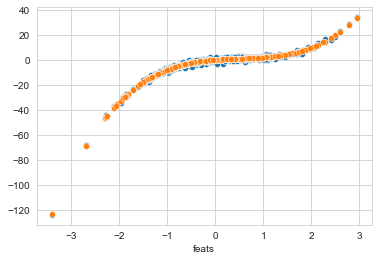

In [122]:
sns.scatterplot(x='feats',y=y3s,data=xdf)
sns.scatterplot(x='feats',y=ypred_3,data=xdf)

### Lets do the Elbow Method to Create Polynomial Model

In [123]:
x=np.random.normal(0,1,500)
y3=np.random.normal(0,1,500) + (3*x) + (-3*(x**2)) + (2*(x**3))

In [124]:
xdf=pd.DataFrame(x,columns=['Feats'])
y3s=pd.Series(y3)

In [125]:
scores=[]
for deg in range(1,11):
    x_poly=pf(degree=deg).fit_transform(xdf)
    model_d=LinearRegression().fit(x_poly,y3s)
    scores += [model_d.score(x_poly,y3s)*100]

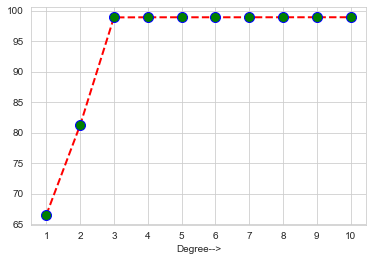

In [127]:
plt.plot(range(1,11),scores,marker='o',lw=2,color='r',markeredgecolor='b',markerfacecolor='g',ls='--',markersize=10)
plt.xticks(range(1,11))
plt.xlabel('Degree-->')
plt.show()

### STARTUP PROFIT PREDICTION

In [128]:
df=pd.read_csv('50_Startups.csv')

In [130]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [133]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [134]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

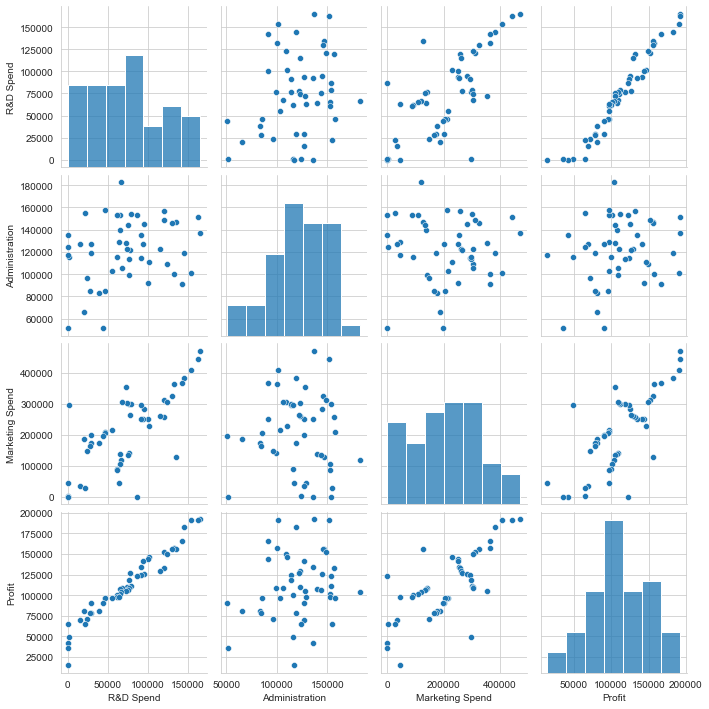

In [135]:
s=sns.pairplot(df)

In [137]:
x=df.drop(['Profit','Administration','State'],axis=1)
y=df['Profit']

model=LinearRegression().fit(x,y)
print(model.score(x,y)*100)

x_poly=pf(3).fit_transform(x)
model_poly=LinearRegression().fit(x_poly,y)
print(model_poly.score(x_poly,y)*100)

95.04503015559763
96.30292677233476


In [139]:
df1=pd.get_dummies(df)
x1=df1.drop(['Profit','Administration'],axis=1)
y1=df1['Profit']
model1=LinearRegression().fit(x1,y1)
print(model1.score(x1,y1)*100)
x_poly1=pf(3).fit_transform(x1)
model_poly1=LinearRegression().fit(x_poly1,y1)
print(model_poly1.score(x_poly1,y1)*100)

95.04533045090851
96.62655619392953
